In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

C:\Users\PC\AppData\Local\Temp\ipykernel_99428\2432245966.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
data_dir = 'data'

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 479 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
# Get batch from iterator
batch = data_iterator.next()

In [9]:
#Preprocess Data

In [10]:
data = data.map(lambda x, y: (x/255, y))

In [11]:
scaled_iterator = data.as_numpy_iterator()

In [12]:
batch = scaled_iterator.next()

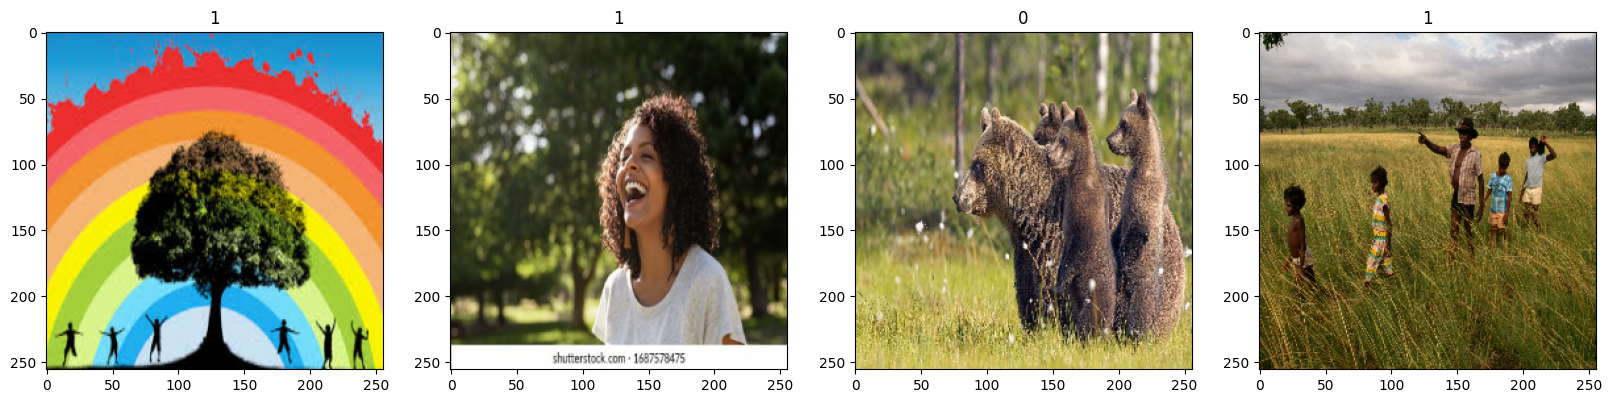

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [15]:
train_size+val_size+test_size

16

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#Training the Data

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - accuracy: 0.4992 - loss: 0.8893 - val_accuracy: 0.4375 - val_loss: 0.6825
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 553ms/step - accuracy: 0.5362 - loss: 0.6404 - val_accuracy: 0.7578 - val_loss: 0.5599
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 541ms/step - accuracy: 0.7816 - loss: 0.5437 - val_accuracy: 0.7969 - val_loss: 0.4479
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 550ms/step - accuracy: 0.7914 - loss: 0.4380 - val_accuracy: 0.8828 - val_loss: 0.3361
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 558ms/step - accuracy: 0.8579 - loss: 0.3536 - val_accuracy: 0.9062 - val_loss: 0.2447
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 561ms/step - accuracy: 0.9145 - loss: 0.2642 - val_accuracy: 0.8516 - val_loss: 0.3258
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 623ms/step - accuracy: 0.8627 - loss: 0.2296 - val_accuracy: 0.9297 - val_loss: 0.1977
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 563ms/step - accuracy: 0.9612 - loss: 0.1209 - val_accuracy: 0.

In [26]:
#Plotting performance

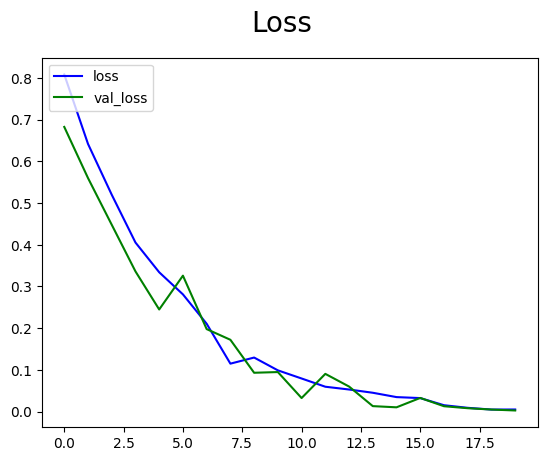

In [43]:
fig, ax = plt.subplots()
ax.plot(hist.history['loss'], color='blue', label='loss')
ax.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
ax.legend(loc="upper left")
plt.show()

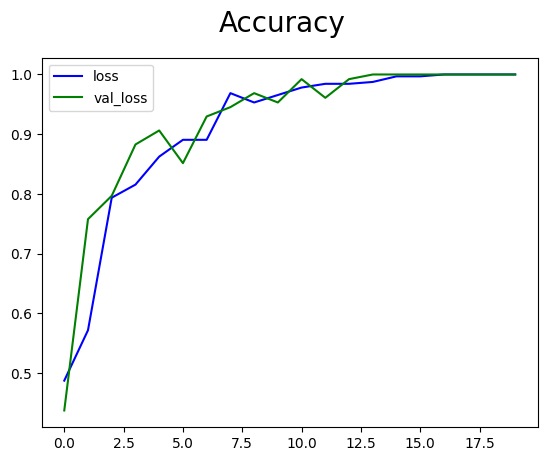

In [28]:
fig, ax = plt.subplots()
ax.plot(hist.history['accuracy'], color='blue', label='loss')
ax.plot(hist.history['val_accuracy'], color='green', label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
ax.legend(loc="upper left")
plt.show()

In [29]:
#Performance Evaluation

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [33]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [34]:
#Testing

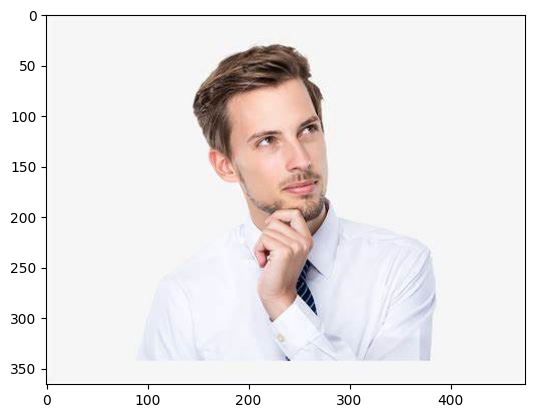

In [35]:
img = cv2.imread('Man.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

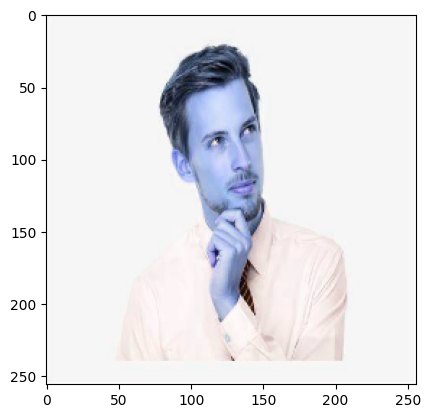

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
resize.shape

TensorShape([256, 256, 3])

In [38]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [39]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [40]:
yhat

array([[0.99960804]], dtype=float32)

In [41]:
if yhat > .5:
    print(f'Predicted class is Person')
else:
    print(f'Predicted class is Animal')

Predicted class is Person
